In [1]:
import numpy as np
import dwtviz
import matplotlib.pyplot as plt
%matplotlib inline

### Visualizing discrete wavelet transform coefficients

[dwtviz](https://github.com/n-s-f/dwtviz) is a library for visualizing the coefficients from the [stationary](https://en.wikipedia.org/wiki/Stationary_wavelet_transform) and [discrete](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) wavelet transforms. 

It uses [pywt](https://github.com/PyWavelets/pywt) to perform the transforms, and [matplotlib](http://matplotlib.org/) for plotting.

### Heatmap visualization

At its core, dwtviz plots a heatmap of the coefficients for discrete and stationary wavelet transforms.

Here's an example of a dwt decomposition using the [db1](http://wavelets.pybytes.com/wavelet/db1/) (haar) wavelet:

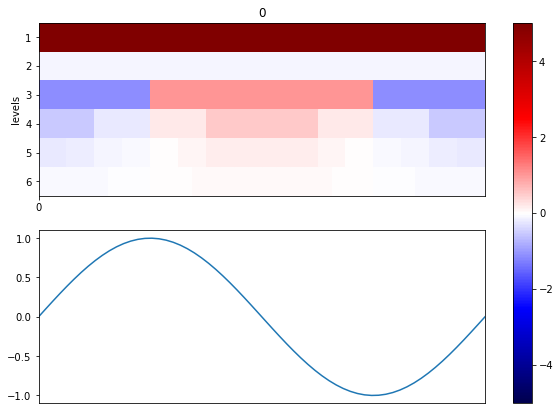

In [2]:
signal = np.sin(np.linspace(0, 2 * np.pi, 2**6))
dwtviz.dwtviz(signal, wavelet='db1');

And here's an swt decomposition of the same signal:

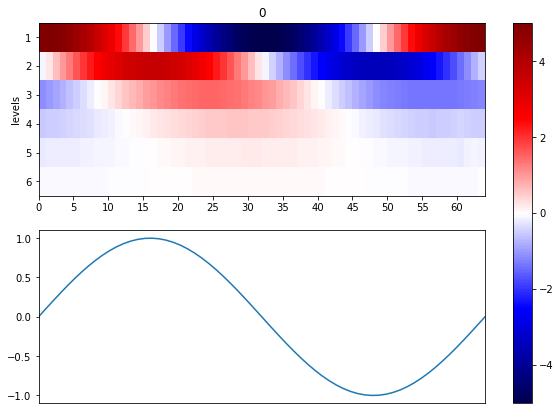

In [3]:
dwtviz.dwtviz(signal, wavelet='db1', decomposition='swt');

### Plotting multiple plots

Often its useful to compare these plots to other similar plots. Note that the plots are indexed for easy reference (these can be disabled with a keyword argument `index=False`).

Note that the colorbar should span the same values, so that color intensity is comparable across plots. By default, `dwtviz` infers limits for the colorbar from the data. If you would like to specify the limit, you can pass a `cbar_limit` keyword argument.

We'll plot 4 noisy versions of the same signal.

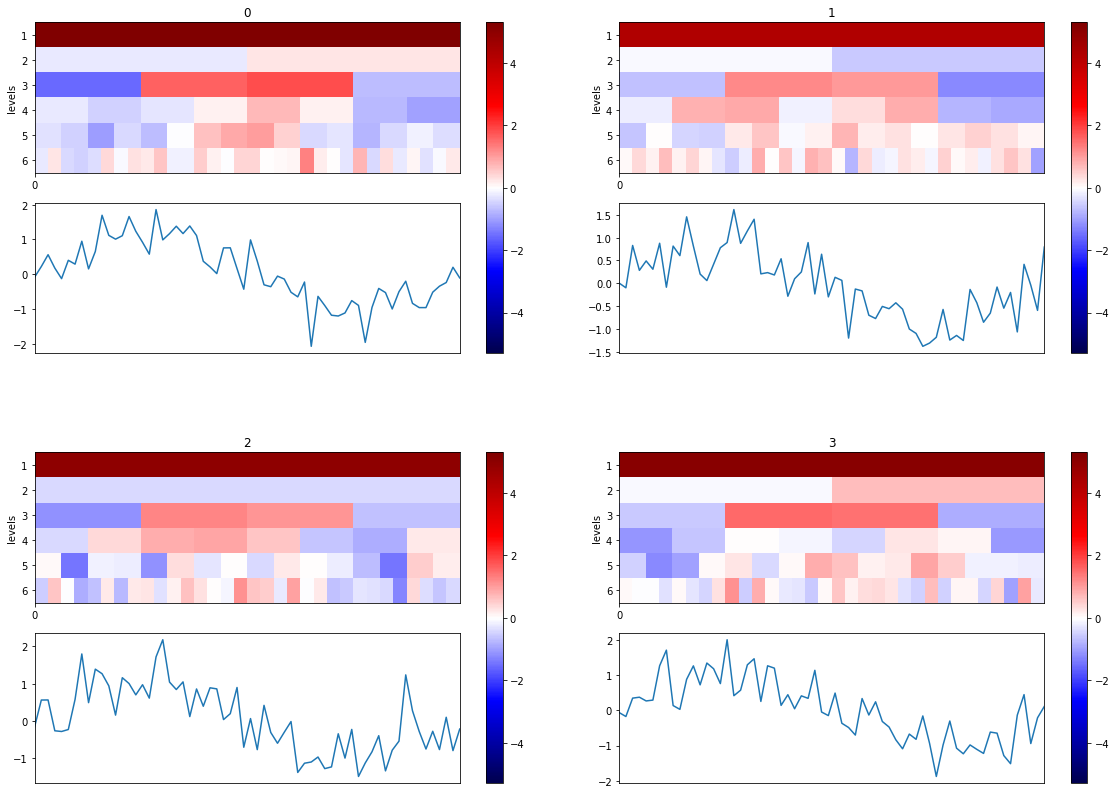

In [4]:
signals = [signal + np.random.normal(0, .5, 2 ** 6) for _ in range(4)]
dwtviz.dwtviz(signals, wavelet='db1');

### Coefficient line plots

Sometimes it's also helpful to see a line plot of the coefficient values. These can be formed by passing `xyplot=True`. If this option is passed, the right column of plots will show one line plot for each level of coefficients.

We'll replot two of the noisy signals in this way:

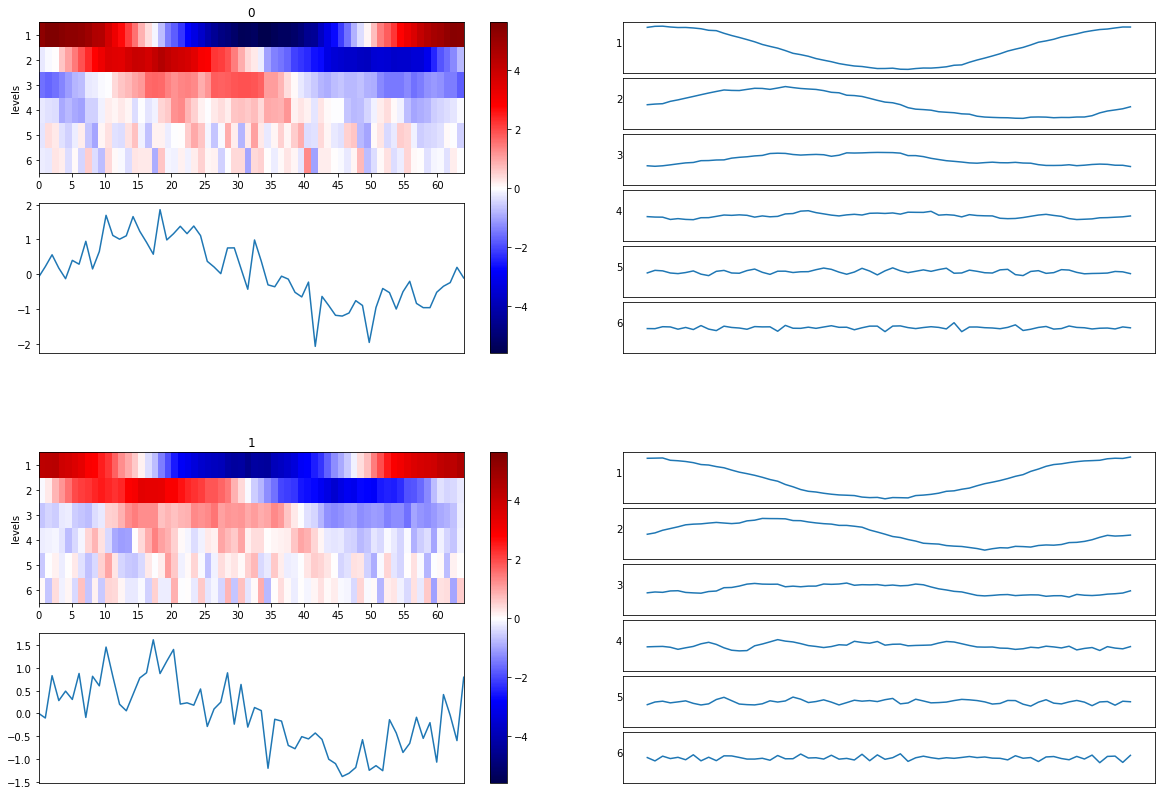

In [5]:
dwtviz.dwtviz(signals[:2], wavelet='db1', decomposition='swt', xyplot=True);

### Irregular data

If you have irregularly sampled data, wavelet decompositions get a little tricky. `dwtviz`'s approach is to offer a `dwtviz_gp` function, which fits a [gaussian process](http://www.gaussianprocess.org/) to you data with [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html), and then takes a decomposition of that fit.

It will probably make sense in most cases to pass your own kernel into the `dwtviz_gp` function, as below. Likewise, the `noise_tolerance` parameter gets passed through to the sklearn GP regression as [alpha](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor).

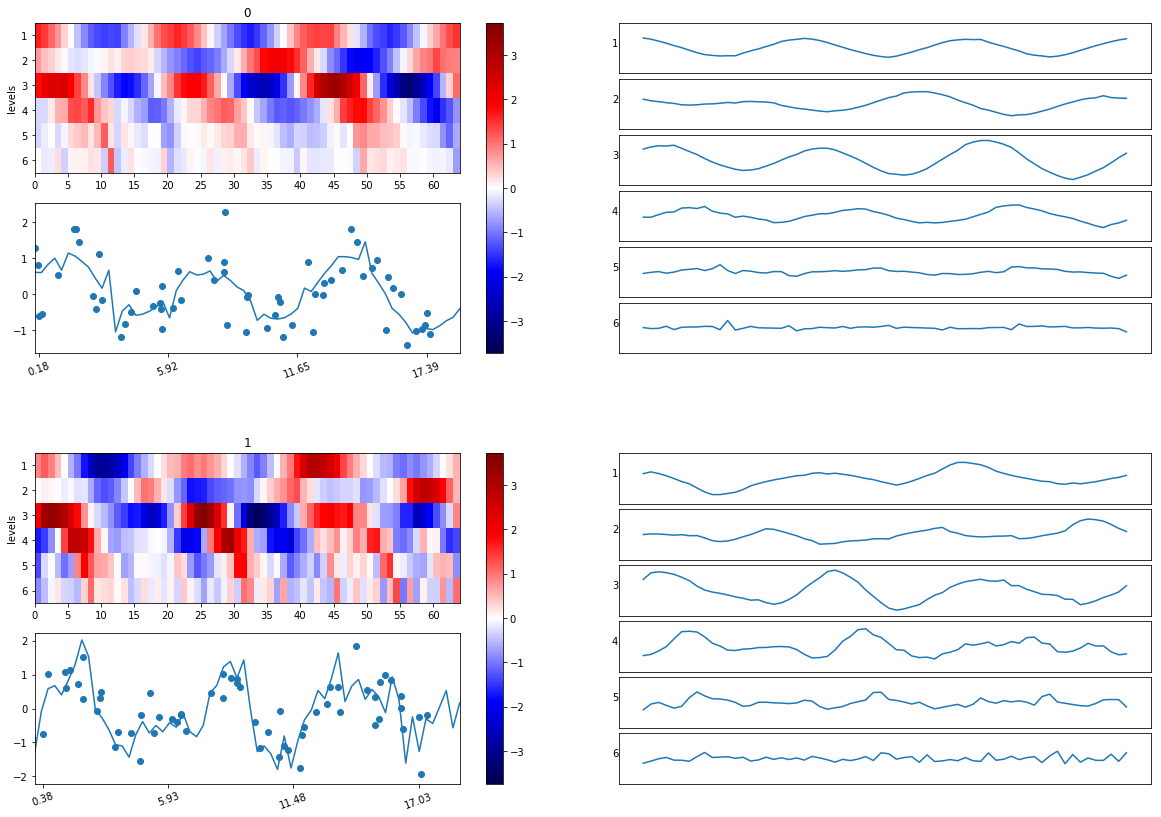

In [6]:
import sklearn.gaussian_process as sgp

signals = []
for _ in range(2):
    x = np.linspace(0, 6 * np.pi, 2**6) + np.random.normal(0, .5, 2**6)
    y = np.sin(x) + np.random.normal(0, .6, 2**6)
    signals.append((x, y))
    
kernel = sgp.kernels.ExpSineSquared(np.pi, 2*np.pi) + sgp.kernels.RBF(np.pi)

dwtviz.dwtviz_gp(signals, kernel=kernel, noise_tolerance=1, 
                 decomposition='swt', xyplot=True, samples=6);

### Conclusion

`dwtviz` can be installed with `pip install dwtviz`.